- what we want to know : 데이터가 따르는 확률 분포
- but ? 데이터 셋의 크기는 유한하기 때문에 정확한 확률 분포를 구하는 것은 불가능
- so ? parameter 에 의해 결정되는 머신러닝 모델을 만든 후, parameter 값을 조절함으로 데이터의 분포를 간접적으로 표현 

> *머신러닝의 목표 : 확률분포를 데이터의 실제 분포에 가깝게 만드는 최적의 파라미터 값을 찾는 것*

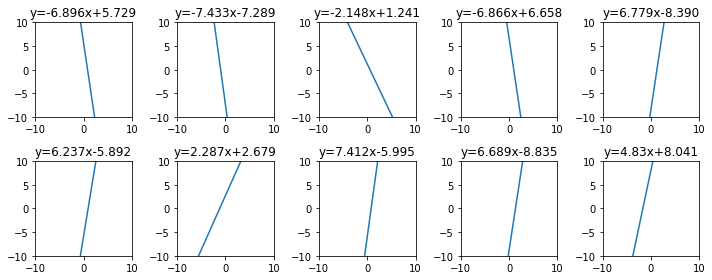

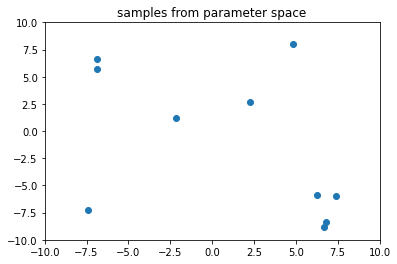

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2,5,figsize=(10,4))

for ax in axes1.flatten():
  # np.random.uniform : 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
  a, b = np.random.uniform(-10,10,size=2)
  a = round(a,3)
  b = round(b,3)
  parameter_points.append((a,b))

  x = np.linspace(-10,10,50)
  y = a*x +b
  ax.plot(x,y)

  ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
  ax.set_xlim(-10,10)
  ax.set_ylim(-10,10)

plt.tight_layout()

px,py = np.split(np.array(parameter_points),2,axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10,10)
axes2.set_ylim(-10,10)

plt.scatter(px,py)
plt.show()

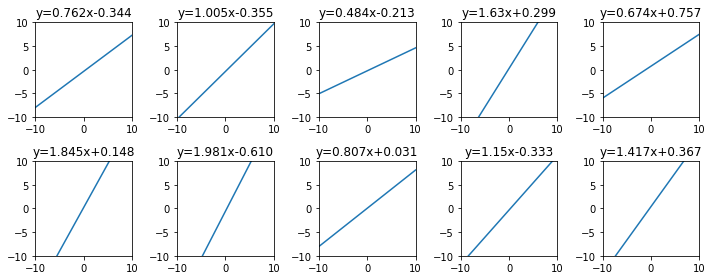

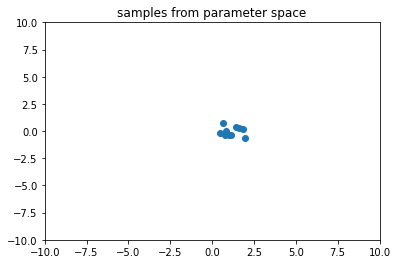

In [ ]:
parameter_points = []
fig1, axes1 = plt.subplots(2,5,figsize=(10,4))

for ax in axes1.flatten():
  # np.random.normal : 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
  a, b = np.random.normal(loc=[1,0],scale=0.5)
  a = round(a,3)
  b = round(b,3)
  parameter_points.append((a,b))

  x = np.linspace(-10,10,50)
  y = a*x +b
  ax.plot(x,y)

  ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
  ax.set_xlim(-10,10)
  ax.set_ylim(-10,10)

plt.tight_layout()

px,py = np.split(np.array(parameter_points),2,axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10,10)
axes2.set_ylim(-10,10)

plt.scatter(px,py)
plt.show()

In [ ]:
# baysian machine learning model 은 데이터를 통해 파라미터 공간의 확률분포를 학습
# 모델 파라미터를 고정된 값이 아닌 uncertainty를 가진 확률 변수로 본다.


# 데이터 집합 X 가 있을 때 데이터가 따르는 확률분포는 p(X), 우리의 목표는 p(X) 를 가장 잘 나타내는 일차함수 모델 y = ax+b 를 찾는 것 
# prior(prior probability) 사전확률 : 데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분포 ,일반적인 정규분포가 될 수도, 데이터의 특성이 반영된 특정 확률 분포가 될 수도
# likelihood 가능도 : prior 를 고정시키고 주어진 파라미터 분포에 대해서 가진 데이터가 얼마나 '그럴듯한지' 나타내는 값 p(X = x|seta), 즉 파라미터의 분포가 정해졌을때, x 라는 데이터가 관찰 될 확률
# likelihood 가 높다 -> 가진 파라미터 조건에서 데이터가 잘 관측될 확률이 높다. 데이터의 분포를 모델이 잘 표현한다 
# MLE(Maximum likelihood estimatioin) 최대 가능도 추정 : likelihood 값을 최대화 하는 방향으로 모델을 학습시키는 방법
# posterior(posterior probability) 사후확률 : 데이터를 관찰 한 후 계산되는 확률 , prior 와 likelihood 에 관한 식으로 posterior 를 최대화 하는 파라미터 seta 를 찾는다.
# MAP(Maximum aposteriori estimation) 최대 사후확률 추정 : posterior 를 최대화 하는 방향으로 모델을 학습시키는 방법 
# 이들의 관계 : posterior = (likelihood * prior) / evidence 

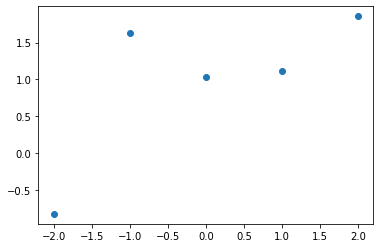

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2,2,5)
label = input_data + 1 + np.random.normal(0,1,size=5)

plt.scatter(input_data,label)
plt.show()

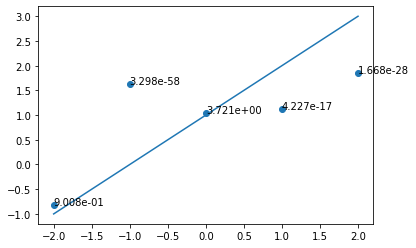

In [ ]:
a = 1 
b = 1 

model_output = a*input_data + b
likelihood = []

for x,y, output in zip(input_data,label,model_output):
  likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2,2,50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data,label)
ax.plot(model_x,model_y)

for i ,text in enumerate(likelihood):
  ax.annotate('%.3e'%text,(input_data[i],label[i]))

plt.show()

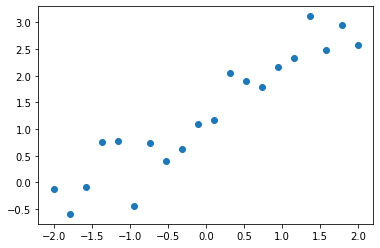

In [ ]:
# MLE 
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2,2,num_samples)
labels = input_data + 1 + np.random.normal(0,0.5,size=num_samples)

plt.scatter(input_data,labels)
plt.show()

In [ ]:
def likelihood(labels, preds):
  result = 1/(np.sqrt(2*math.pi*0.1*0.1)*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1)))

  return np.prod(result)

def neg_log_likelihood(labels,preds):
  const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

  return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578bias: 1.2847
likelihood:3.6585e+77
negative log likelihood: 1.2325e+02


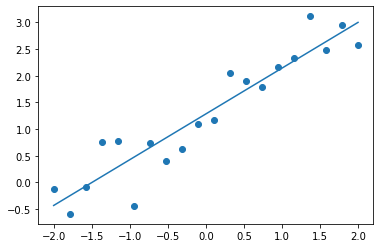

In [ ]:
X = np.append(input_data.reshape((-1,1)),np.ones((num_samples,1)),axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

print('slope: '+'%.4f'%theta_1+'bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood:'+'%.4e'%likelihood(labels,predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels,predictions))

model_x = np.linspace(-2,2,50)
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data,labels)
plt.plot(model_x,model_y)
plt.show()

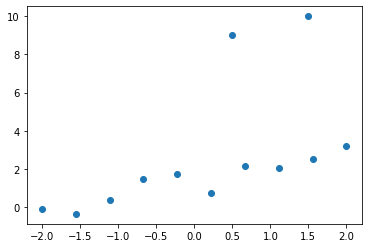

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2,2,num_samples)
labels = input_data + 1 + np.random.normal(0,0.5,size=num_samples)

input_data = np.append(input_data,[0.5,1.5])
labels = np.append(labels, [9.0,10.0])

plt.scatter(input_data,labels)
plt.show()

In [ ]:
# prior 분포의 등장 
# MLE 의 최적해는 오로지 관측된 데이터 값에만 의존 -> 계산이 비교적 간단하지만, 관측된 데이터에 노이즈가 많이 섞인 경우 또는 이상치데이터가 존재하는 경우 모델의 안정성이 떨어진다.

In [ ]:
def likelihood(labels,preds):
  result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))

  return np.prod(result)

def neg_log_likelihood(labels, preds):
  const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

  return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03



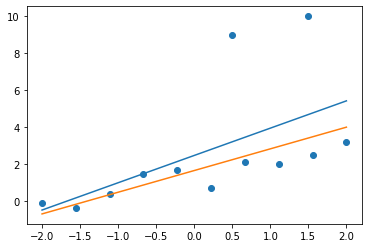

In [ ]:
x = np.append(input_data.reshape((-1,1)),np.ones((num_samples+2,1)),axis=1)
y = labels


mle_theta_1 , mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)

map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)+(0.1*0.1)/(0.04*0.04)*np.eye(2)),x.T),y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1 + ' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels,mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels,mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1 + ' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels,map_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels,map_preds))

model_x = np.linspace(-2,2,50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data,labels)
plt.plot(model_x,mle_model_y)
plt.plot(model_x,map_model_y)
plt.show()